In [1]:
library(e1071)
library(caret)
library(tidyr)
library(ggplot2)
library(cowplot)

Loading required package: lattice

Loading required package: ggplot2



# Import datasets

In [2]:
pca_summary <- read.table('../data/PCA_summary_sym5.tsv')
pc1 <- read.table('../data/PC1_results_sym5.tsv')
pc2 <- read.table('../data/PC2_results_sym5.tsv')
sample_ids <- read.table('../data/sample_names.tsv',sep = '\t')

## Discrete Wavelet Transform PCA results

Importing PC coordinates (PC1 and PC2) for each gene. In the imported dataframes each row is a gene's results, and each column is an individual sample. There are two dataframe, one for PC1 and another for PC2.

In [3]:
rownames(pc1) <- pca_summary$V1
colnames(pc1) <- sample_ids$V2
head(pc1)

,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL17-C18orf32,-0.1819428,-0.1284537,-0.04969563,-0.10048620,-0.10072771,-0.01277589,-0.01494658,-0.05711139,-0.08030614,-0.13254076,-0.11691054,-0.09878947,-0.09303661,-0.1682790,0.52803461,0.21872542,0.35674828,0.2324940
TIMM13,-0.1086536,-0.1092551,-0.06094915,-0.08038964,-0.08268855,0.06109090,0.09299741,0.45430214,0.45247626,-0.13148317,-0.08683916,-0.08314089,-0.07154359,-0.1335841,-0.02968349,-0.02849685,-0.02185261,-0.0323067
RPL8,-0.2449365,-0.2640702,0.01496759,-0.10245875,-0.05521489,0.09596647,0.11883337,0.13912131,0.17791454,-0.27838539,-0.26446575,-0.03084357,-0.02228081,-0.2365147,0.29941838,0.18242902,0.25569056,0.2148292
SNHG3,0.3479087,0.3915250,-0.05644613,-0.07999743,-0.09099838,-0.14443956,-0.15196123,-0.17130895,-0.19763891,0.40722141,0.37062735,-0.08459394,-0.09360013,0.3734190,-0.21025468,-0.18406723,-0.23080519,-0.1945896
MIR7111,-0.1178796,-0.1565474,-0.12718782,-0.09383582,-0.10080322,0.06485780,0.04319844,0.03583369,0.09128816,-0.13855511,-0.14053323,-0.07209866,-0.11298433,-0.1656009,0.12471392,0.27160772,0.37348317,0.2210431
GPX4,-0.2011869,-0.1116930,-0.10393712,-0.03393223,-0.01691343,-0.03165348,-0.06291215,-0.01937902,-0.01280003,-0.09200959,-0.10595462,-0.02354376,-0.02359616,-0.1466575,0.57143940,0.17686393,0.13601343,0.1018522


In [4]:
rownames(pc2) <- pca_summary$V1
colnames(pc2) <- sample_ids$V2
head(pc2)

,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL17-C18orf32,0.25735254,0.18554097,0.046525279,-0.204157456,-0.20416033,-0.02456343,-0.04034203,-0.17104136,-0.25731060,0.21110528,0.19661902,-0.198939532,-0.186014090,0.23244861,0.04452493,0.04847738,0.03771281,0.02622200
TIMM13,0.13215599,0.11483615,-0.082038743,-0.065875951,-0.06578660,-0.04533184,-0.08434663,0.08325138,0.04932476,0.20973617,0.10685577,-0.082682063,-0.077263123,0.18303579,-0.09827468,-0.08827178,-0.09570734,-0.09361727
RPL8,-0.12195277,-0.12068283,0.054882559,0.259615324,0.19501329,0.01949865,0.03430597,0.02974566,0.02948284,-0.10636728,-0.13079174,0.197741035,0.185446762,-0.08800224,-0.20278284,-0.04314733,-0.13392497,-0.05808008
SNHG3,-0.04416584,-0.03437214,0.001016223,0.295893075,0.26190455,-0.07458264,-0.08754308,-0.11105183,-0.14150309,-0.04788156,-0.04710865,0.285745003,0.272079597,-0.03039185,-0.12779484,-0.10335370,-0.15010932,-0.11677991
MIR7111,-0.03737509,-0.01793452,-0.093313433,-0.030197409,-0.01157716,0.14327085,0.16363241,0.16484115,0.21807054,-0.04526629,-0.04177746,0.009599872,-0.027193435,-0.05506784,-0.09515939,-0.08420141,-0.12278847,-0.03756291
GPX4,0.30852097,0.09808850,0.056835841,0.006147853,-0.01346156,-0.09062774,-0.30000676,-0.16510758,-0.25800948,0.08323304,0.11401922,-0.011988067,-0.006851955,0.11926237,0.18315078,-0.04974808,-0.02703861,-0.04641875


# Support Vector Machine

## Leave-one-out cross-validation

In [5]:
multi_gene_cv <- function(pca1, pca2, levels, N=10, K=18) {

    #' Perform svm cross-validation on PC1 and PC2 values from DWT
    #' 
    #' @description Run svm cross-validation on multiple genes to determine how many
    #' genes accurately label protocol
    #'
    #' @param pca1 data.frame. of pc1 valuers (row=genes, columns=samples)
    #' 
    #' @param pca1 data.frame. of pc2 valuers (row=genes, columns=samples)
    #' 
    #' @param levels lists of factor levels eg. c("GRO","PRO")
    #'
    #' @param N number of genes to evaluate in the original pca summary data frame (default = 10)
    #'
    #' @param K number of Cross Validations (default = 18)
    #'
    #' @usage multi_gene_cv(pca1, pca2, levels, N=10, K=18)
    #'
    #' @return cv_df a data frame with accuracy of each fold
    #'
    #' @export

    #Initialize a data.frame of K+1 by N
    cv_matrix <- matrix(0, ncol = K+1, nrow = N)
    cv_df <- data.frame(cv_matrix)
    colnames(cv_df) <- c("id", paste0("Fold",seq(1,K,1)))
    
    for(i in 1:N){
        
        #subset the data by rows specifying the genes 
        dataset_pc1 <- pca1[i,]
        dataset_pc2 <- pca2[i,]

        #creating a transformed dataframe of the pc values
        dataset <- as.data.frame(t(rbind(dataset_pc2, dataset_pc1)))
        colnames(dataset) <- c("pc2", "pc1")
        dataset$protocol <- colnames(dataset_pc1)

        #set protocol as factor
        dataset$protocol <- factor(dataset$protocol, levels = levels)
        
        #specify the target feature (dependent variable) and # of folds
        folds <- createFolds(dataset$protocol, k = K)

        #apply a function to the 'folds'
        cv_all <- lapply(folds, function(x) { 

          #separate the training set and test set (1 test vs 17 train default)
          training_fold <- dataset[-x, ] # training fold = training set 
          test_fold <- dataset[x, ] #the test fold individually

          #now apply (train) the classifer on the training_fold
          classifier <- svm(formula = protocol ~ .,
                           data = training_fold,
                           kernel = 'linear')

          #next we calculate the predictions and cm and calculate the accuracy
          #training on training_fold and testing its accuracy on the test_fold
          y_pred <- predict(classifier, newdata = test_fold[-3])
          cm <- table(test_fold[, 3], y_pred)
          accuracy <- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
          return(accuracy)

        })

        #write the per gene fold accuracy values to dataframe
        gene <- rownames(dataset_pc1)
        cv_df[i,] <- c(gene, cv_all)

    }
    
    return(cv_df)
    
}

## Get 294 genes with a CV < 0.55 and average TPM > 150

In [7]:
all_cv0.55_tpm150 <- read.table('../data/filtered_genes_cv0.55_tpm150.txt')
head(all_cv0.55_tpm150)

,Chi_DMSO_S9,Chi_Nutlin_S10,DMSO_1_S1_R1_001,DMSO_2_S2_R1_001,DMSO_HCT116_RPI_26_S1_R1_001,GRO15_DMSO_062111_042215,GRO18_DMSO10_062111_042215,GRO20_DMSO100_062111_042215,i13_AGTCAA_L008_R1_001,i14_AGTTCC_L008_R1_001,⋯,SRR1105736,SRR1105737,SRR1105738,SRR1105739,SRR828696,stdev,variance,mean,median,coefvar
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OR51B5,194.5833,217.3396,33.90581,92.00847,78.6986,22.06616,212.9886,339.2758,303.4877,315.1482,⋯,131.8348,89.71403,160.3187,91.14861,157.1025,88.18898,7777.295,167.9770,173.4195,0.5250061
HMGA2,223.1193,246.0626,40.14329,128.45217,109.0519,46.80373,184.1352,221.7500,230.6041,230.2170,⋯,128.1851,84.82508,157.6145,104.98779,317.4584,75.98126,5773.152,173.4780,167.7396,0.4379880
DCBLD2,233.4016,280.3235,58.33268,128.39742,111.2093,81.61121,247.5880,352.1222,274.7969,263.0912,⋯,115.1290,94.22335,143.2882,106.78887,327.3241,88.58189,7846.751,192.5260,181.5008,0.4601036
MIR31HG,291.9281,350.7752,48.63528,184.39023,156.1311,63.20852,220.4406,329.2291,274.3984,308.0299,⋯,121.1801,90.09769,184.7797,101.68272,336.2130,96.35944,9285.141,215.5291,197.0213,0.4470832
KITLG,213.7583,257.7954,25.96867,119.03966,104.1396,12.97868,134.3955,182.3831,254.7593,274.0797,⋯,116.4485,56.42292,174.4590,70.59619,165.9261,80.78378,6526.019,163.4073,174.5249,0.4943707
EZR,251.7938,267.8912,197.61477,274.40673,243.8394,184.91296,313.3723,361.0443,262.4123,238.6501,⋯,149.2468,131.57567,179.7790,143.46377,325.7238,72.43035,5246.156,236.0308,241.2448,0.3068682


In [8]:
pc1_all294 <- pc1[rownames(pc1) %in% rownames(all_cv0.55_tpm150),]
head(pc1_all294)
dim(pc1_all294)

,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL17-C18orf32,-0.18194277,-0.12845368,-0.04969563,-0.10048620,-0.10072771,-0.012775892,-0.01494658,-0.057111387,-0.08030614,-0.1325408,-0.11691054,-0.09878947,-0.093036607,-0.16827899,0.5280346,0.21872542,0.356748284,0.23249404
RPL8,-0.24493652,-0.26407016,0.01496759,-0.10245875,-0.05521489,0.095966469,0.11883337,0.139121312,0.17791454,-0.2783854,-0.26446575,-0.03084357,-0.022280810,-0.23651467,0.2994184,0.18242902,0.255690559,0.21482925
SNHG3,0.34790867,0.39152498,-0.05644613,-0.07999743,-0.09099838,-0.144439558,-0.15196123,-0.171308946,-0.19763891,0.4072214,0.37062735,-0.08459394,-0.093600131,0.37341897,-0.2102547,-0.18406723,-0.230805188,-0.19458963
MIR3655,0.03212761,0.04970272,-0.11154665,-0.01227320,-0.03580710,-0.047096921,-0.08730010,-0.023700748,0.04116451,0.5856906,0.04763881,-0.01101960,0.005413108,0.02168105,-0.3355692,-0.03486262,-0.009120135,-0.07512214
RPS28,0.23241134,0.27635884,0.06444131,-0.02451037,-0.01718609,-0.049093908,-0.05804573,-0.056889518,-0.04532883,0.1527770,0.27114415,-0.01671039,-0.013701653,0.14104693,-0.1661391,-0.20440245,-0.246253048,-0.23991848
H3C2,-0.14609805,-0.15028739,-0.15184996,-0.09110353,-0.09600250,-0.002052879,0.01143913,0.007165283,0.05344575,-0.1374744,-0.13620797,-0.09157828,-0.091034667,-0.14308344,0.2837938,0.28958578,0.267793605,0.32354967


[1] 294  18

In [9]:
pc2_all294 <- pc2[rownames(pc2) %in% rownames(all_cv0.55_tpm150),]
head(pc2_all294)
dim(pc2_all294)

,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL17-C18orf32,0.25735254,0.18554097,0.0465252786,-0.20415746,-0.204160333,-0.02456343,-0.04034203,-0.17104136,-0.25731060,0.21110528,0.19661902,-0.19893953,-0.186014090,0.23244861,0.04452493,0.04847738,0.03771281,0.02622200
RPL8,-0.12195277,-0.12068283,0.0548825591,0.25961532,0.195013292,0.01949865,0.03430597,0.02974566,0.02948284,-0.10636728,-0.13079174,0.19774104,0.185446762,-0.08800224,-0.20278284,-0.04314733,-0.13392497,-0.05808008
SNHG3,-0.04416584,-0.03437214,0.0010162228,0.29589307,0.261904552,-0.07458264,-0.08754308,-0.11105183,-0.14150309,-0.04788156,-0.04710865,0.28574500,0.272079597,-0.03039185,-0.12779484,-0.10335370,-0.15010932,-0.11677991
MIR3655,0.40354036,0.12182793,0.1069815433,-0.11016239,-0.063168241,-0.08193700,-0.07591784,-0.12896631,-0.11635215,0.05568198,0.04113199,-0.08663447,-0.042861151,0.05221266,0.19879559,-0.07714553,-0.10092997,-0.09609699
RPS28,-0.09425353,-0.10939685,0.0674239689,0.05880675,0.053054309,0.11180592,0.16145263,0.16005945,0.24732101,-0.03782182,-0.09585879,0.05854213,0.054720117,-0.05899044,-0.10103138,-0.13765419,-0.17120134,-0.16697792
H3C2,-0.07717118,-0.09376201,-0.0001695261,-0.00172033,-0.004488952,0.11033193,0.15269661,0.18543781,0.24219434,-0.08580052,-0.07766302,-0.00310108,-0.000728905,-0.08396850,-0.06947127,-0.04373710,-0.07245343,-0.07642487


[1] 294  18

In [10]:
cv_all294 <- multi_gene_cv(pc1_all294, pc2_all294, c('GRO', 'PRO'), N=nrow(pc1_all294))

In [11]:
cv_gather_all294 <- cv_all294 %>% gather(key, value, -id) 

In [12]:
sample_accuracy_rate_all294 <- sample_ids
sample_accuracy_rate_all294$accurate_genes <- colSums(cv_all294[c(2:19)])
sample_accuracy_rate_all294$percent_accuracy <- (colSums(cv_all294[c(2:19)])/nrow(cv_all294))*100
sample_accuracy_rate_all294$id <- paste0(sample_accuracy_rate_all294$V2, '-',sample_accuracy_rate_all294$V3)
sample_accuracy_rate_all294$sample_names <- factor(sample_accuracy_rate_all294$V1,
                                                   levels = sample_accuracy_rate_all294$V1)
sample_accuracy_rate_all294

V1,V2,V3,accurate_genes,percent_accuracy,id,sample_names
<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>
Chi_DMSO_S9.bedGraph,PRO,LIG,293,99.65986,PRO-LIG,Chi_DMSO_S9.bedGraph
Chi_Nutlin_S10.bedGraph,PRO,LIG,293,99.65986,PRO-LIG,Chi_Nutlin_S10.bedGraph
DMSO_HCT116_RPI_26_S1_R1_001.bedGraph,PRO,LIG,233,79.25170,PRO-LIG,DMSO_HCT116_RPI_26_S1_R1_001.bedGraph
DMSO-1_S1_R1_001.bedGraph,PRO,TSRT,269,91.49660,PRO-TSRT,DMSO-1_S1_R1_001.bedGraph
DMSO-2_S2_R1_001.bedGraph,PRO,TSRT,269,91.49660,PRO-TSRT,DMSO-2_S2_R1_001.bedGraph
i13_AGTCAA_L008_R1_001.bedGraph,GRO,LIG,207,70.40816,GRO-LIG,i13_AGTCAA_L008_R1_001.bedGraph
i14_AGTTCC_L008_R1_001.bedGraph,GRO,LIG,229,77.89116,GRO-LIG,i14_AGTTCC_L008_R1_001.bedGraph
i17_GTAGAG_L008_R1_001.bedGraph,GRO,LIG,228,77.55102,GRO-LIG,i17_GTAGAG_L008_R1_001.bedGraph
i18_GTCCGC_L008_R1_001.bedGraph,GRO,LIG,238,80.95238,GRO-LIG,i18_GTCCGC_L008_R1_001.bedGraph


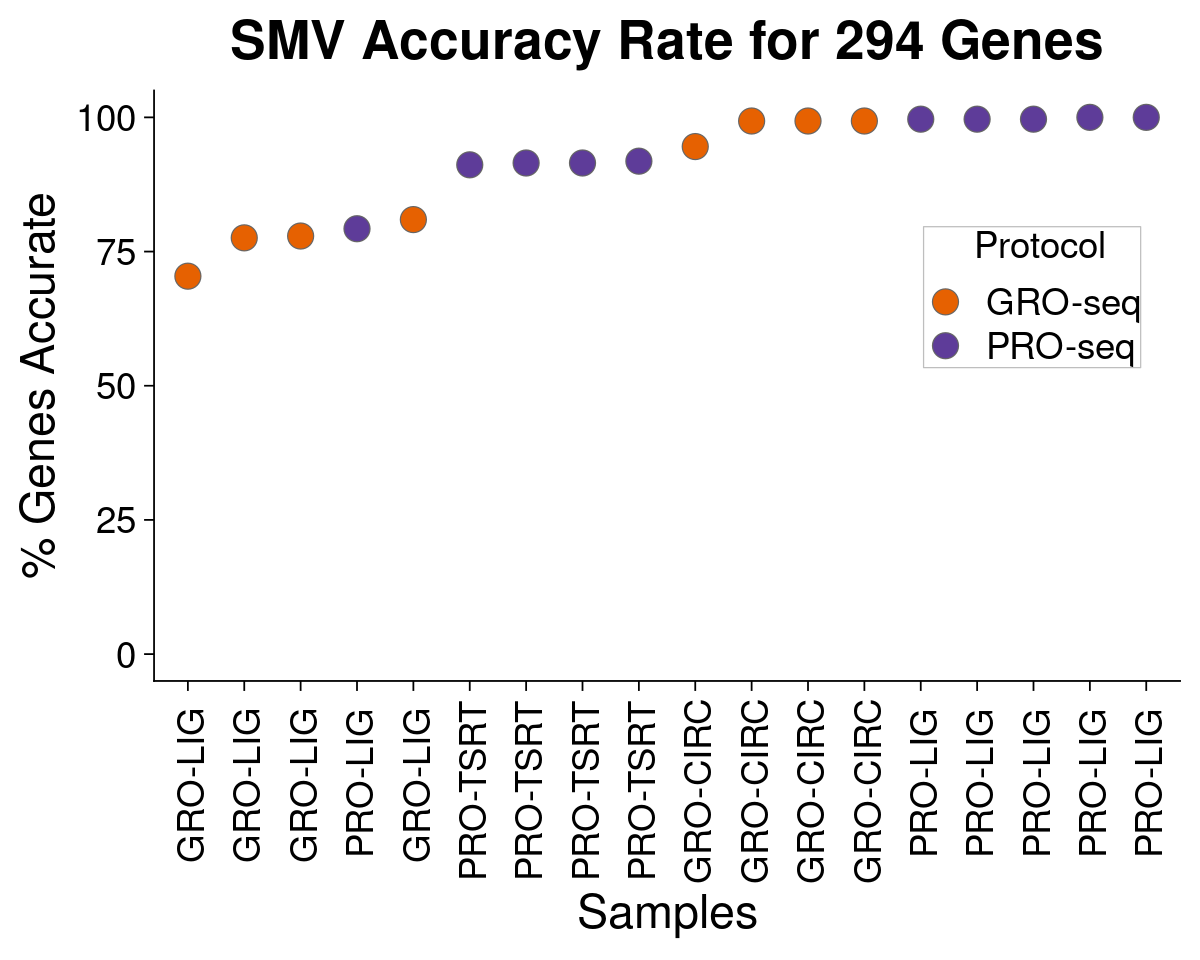

In [13]:
options(repr.plot.width=10, repr.plot.height=8)

svm_all294 <- ggplot(sample_accuracy_rate_all294, 
                  aes(x=reorder(sample_names, percent_accuracy),
                                 y=percent_accuracy, fill=V2)) + 
geom_point(size=7, shape=21,color="gray40") + 
theme_cowplot(24) +
scale_fill_manual(name='     Protocol',
                  values = c('#e66101','#5e3c99'),
                 labels = c("GRO-seq", "PRO-seq")) +
ggtitle("SMV Accuracy Rate for 294 Genes") +
ylab("% Genes Accurate") +
xlab("Samples") +
scale_y_continuous(limits = c(0,100)) +
scale_x_discrete(breaks=as.character(sample_accuracy_rate_all294$sample_names), 
                 labels=as.character(sample_accuracy_rate_all294$id)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 22),
      legend.position = c(0.75,0.65),
      axis.text.x = element_text(size = 22,
                                 angle = 90, vjust=0.6, hjust=0.75),
      legend.title = element_text(size = 22),
      legend.text = element_text(size = 22),
      legend.background = element_blank(),
      legend.box.background = element_rect(colour = "gray")) 

svm_all294

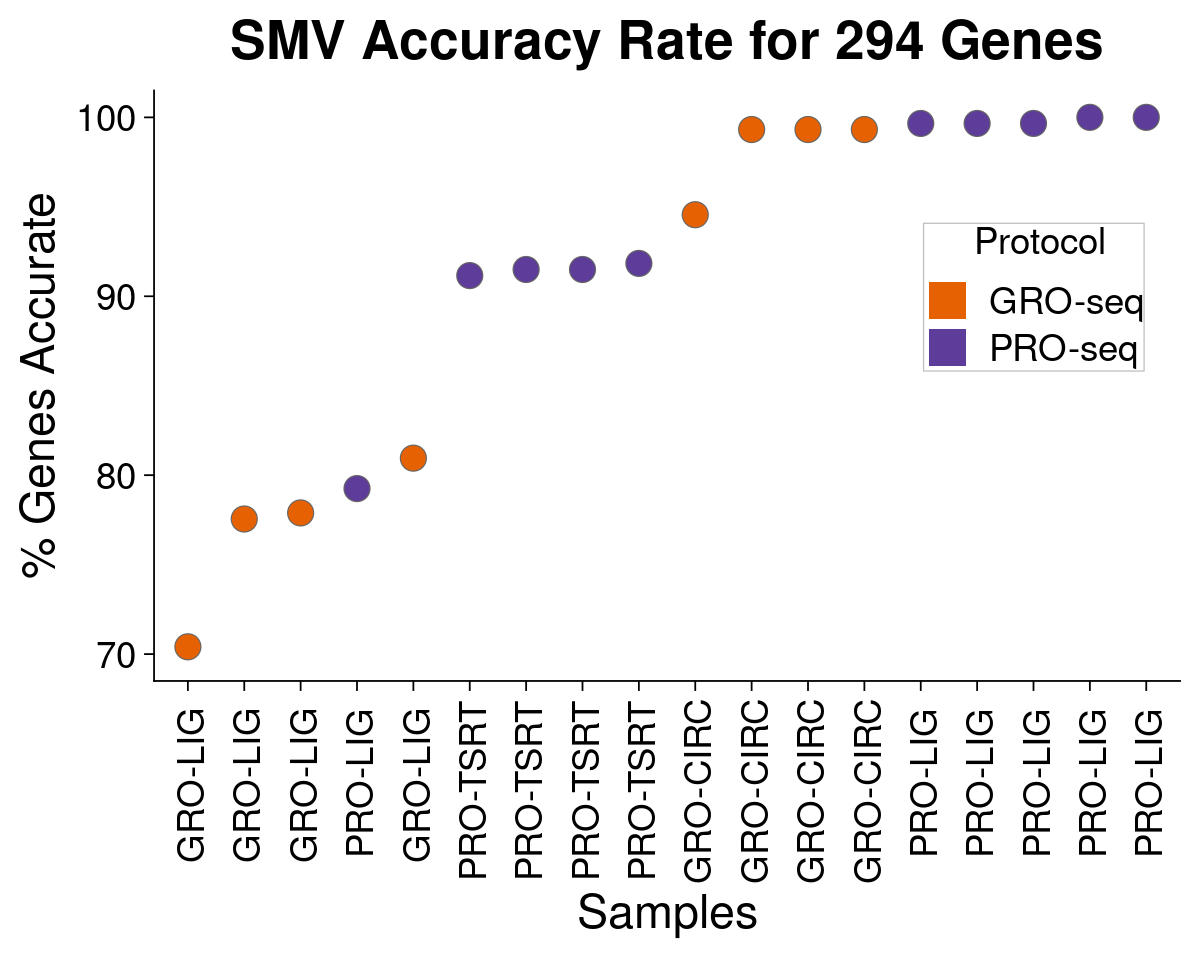

In [14]:
svm_all294_trunc <- ggplot(sample_accuracy_rate_all294, 
                  aes(x=reorder(sample_names, percent_accuracy),
                                 y=percent_accuracy, fill=V2)) + 
geom_point(size=7, shape=21,color="gray40") + 
theme_cowplot(24) +
guides(fill = guide_legend(override.aes = list(shape = 15, 
                                               size = 10,
                                               col=c('#e66101','#5e3c99')))) +
scale_fill_manual(name='     Protocol',
                  values = c('#e66101','#5e3c99'),
                 labels = c("GRO-seq", "PRO-seq")) +
ggtitle("SMV Accuracy Rate for 294 Genes") +
ylab("% Genes Accurate") +
xlab("Samples") +
scale_y_continuous(limits = c(70,100)) +
scale_x_discrete(breaks=as.character(sample_accuracy_rate_all294$sample_names), 
                 labels=as.character(sample_accuracy_rate_all294$id)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 22),
      legend.position = c(0.75,0.65),
      axis.text.x = element_text(size = 22,
                                 angle = 90, vjust=0.6, hjust=0.75),
      legend.title = element_text(size = 22),
      legend.text = element_text(size = 22),
      legend.background = element_blank(),
      legend.box.background = element_rect(colour = "gray")) 

svm_all294_trunc

## Get 669 genes with a CV < 0.85 and average TPM > 100

In [16]:
all_cv0.85_tpm100 <- read.table('../data/filtered_genes_cv0.85_tpm100.txt')
head(all_cv0.85_tpm100)

,Chi_DMSO_S9,Chi_Nutlin_S10,DMSO_1_S1_R1_001,DMSO_2_S2_R1_001,DMSO_HCT116_RPI_26_S1_R1_001,GRO15_DMSO_062111_042215,GRO18_DMSO10_062111_042215,GRO20_DMSO100_062111_042215,i13_AGTCAA_L008_R1_001,i14_AGTTCC_L008_R1_001,⋯,SRR1105736,SRR1105737,SRR1105738,SRR1105739,SRR828696,stdev,variance,mean,median,coefvar
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OR51B5,194.5833,217.3396,33.90581,92.00847,78.6986,22.06616,212.9886,339.2758,303.4877,315.14822,⋯,131.83483,89.71403,160.31871,91.14861,157.1025,88.18898,7777.295,167.9770,173.4195,0.5250061
HMGA2,223.1193,246.0626,40.14329,128.45217,109.0519,46.80373,184.1352,221.7500,230.6041,230.21696,⋯,128.18515,84.82508,157.61447,104.98779,317.4584,75.98126,5773.152,173.4780,167.7396,0.4379880
DCBLD2,233.4016,280.3235,58.33268,128.39742,111.2093,81.61121,247.5880,352.1222,274.7969,263.09123,⋯,115.12902,94.22335,143.28816,106.78887,327.3241,88.58189,7846.751,192.5260,181.5008,0.4601036
MIR31HG,291.9281,350.7752,48.63528,184.39023,156.1311,63.20852,220.4406,329.2291,274.3984,308.02986,⋯,121.18008,90.09769,184.77968,101.68272,336.2130,96.35944,9285.141,215.5291,197.0213,0.4470832
KITLG,213.7583,257.7954,25.96867,119.03966,104.1396,12.97868,134.3955,182.3831,254.7593,274.07968,⋯,116.44852,56.42292,174.45904,70.59619,165.9261,80.78378,6526.019,163.4073,174.5249,0.4943707
MTAP,123.2972,139.5489,42.73728,157.19124,136.8920,20.62320,116.4906,145.6277,120.1852,85.25777,⋯,75.18403,57.55287,66.89279,58.77474,129.1608,43.87866,1925.337,105.4481,115.7186,0.4161162


In [17]:
pc1_all669 <- pc1[rownames(pc1) %in% rownames(all_cv0.85_tpm100),]
head(pc1_all669)
dim(pc1_all669)

,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL17-C18orf32,-0.1819428,-0.1284537,-0.04969563,-0.10048620,-0.10072771,-0.01277589,-0.01494658,-0.05711139,-0.08030614,-0.13254076,-0.11691054,-0.09878947,-0.09303661,-0.1682790,0.52803461,0.21872542,0.35674828,0.2324940
TIMM13,-0.1086536,-0.1092551,-0.06094915,-0.08038964,-0.08268855,0.06109090,0.09299741,0.45430214,0.45247626,-0.13148317,-0.08683916,-0.08314089,-0.07154359,-0.1335841,-0.02968349,-0.02849685,-0.02185261,-0.0323067
RPL8,-0.2449365,-0.2640702,0.01496759,-0.10245875,-0.05521489,0.09596647,0.11883337,0.13912131,0.17791454,-0.27838539,-0.26446575,-0.03084357,-0.02228081,-0.2365147,0.29941838,0.18242902,0.25569056,0.2148292
SNHG3,0.3479087,0.3915250,-0.05644613,-0.07999743,-0.09099838,-0.14443956,-0.15196123,-0.17130895,-0.19763891,0.40722141,0.37062735,-0.08459394,-0.09360013,0.3734190,-0.21025468,-0.18406723,-0.23080519,-0.1945896
MIR7111,-0.1178796,-0.1565474,-0.12718782,-0.09383582,-0.10080322,0.06485780,0.04319844,0.03583369,0.09128816,-0.13855511,-0.14053323,-0.07209866,-0.11298433,-0.1656009,0.12471392,0.27160772,0.37348317,0.2210431
GPX4,-0.2011869,-0.1116930,-0.10393712,-0.03393223,-0.01691343,-0.03165348,-0.06291215,-0.01937902,-0.01280003,-0.09200959,-0.10595462,-0.02354376,-0.02359616,-0.1466575,0.57143940,0.17686393,0.13601343,0.1018522


[1] 669  18

In [18]:
pc2_all669 <- pc2[rownames(pc2) %in% rownames(all_cv0.85_tpm100),]
head(pc2_all669)
dim(pc2_all669)

,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPL17-C18orf32,0.25735254,0.18554097,0.046525279,-0.204157456,-0.20416033,-0.02456343,-0.04034203,-0.17104136,-0.25731060,0.21110528,0.19661902,-0.198939532,-0.186014090,0.23244861,0.04452493,0.04847738,0.03771281,0.02622200
TIMM13,0.13215599,0.11483615,-0.082038743,-0.065875951,-0.06578660,-0.04533184,-0.08434663,0.08325138,0.04932476,0.20973617,0.10685577,-0.082682063,-0.077263123,0.18303579,-0.09827468,-0.08827178,-0.09570734,-0.09361727
RPL8,-0.12195277,-0.12068283,0.054882559,0.259615324,0.19501329,0.01949865,0.03430597,0.02974566,0.02948284,-0.10636728,-0.13079174,0.197741035,0.185446762,-0.08800224,-0.20278284,-0.04314733,-0.13392497,-0.05808008
SNHG3,-0.04416584,-0.03437214,0.001016223,0.295893075,0.26190455,-0.07458264,-0.08754308,-0.11105183,-0.14150309,-0.04788156,-0.04710865,0.285745003,0.272079597,-0.03039185,-0.12779484,-0.10335370,-0.15010932,-0.11677991
MIR7111,-0.03737509,-0.01793452,-0.093313433,-0.030197409,-0.01157716,0.14327085,0.16363241,0.16484115,0.21807054,-0.04526629,-0.04177746,0.009599872,-0.027193435,-0.05506784,-0.09515939,-0.08420141,-0.12278847,-0.03756291
GPX4,0.30852097,0.09808850,0.056835841,0.006147853,-0.01346156,-0.09062774,-0.30000676,-0.16510758,-0.25800948,0.08323304,0.11401922,-0.011988067,-0.006851955,0.11926237,0.18315078,-0.04974808,-0.02703861,-0.04641875


[1] 669  18

In [19]:
cv_all669 <- multi_gene_cv(pc1_all669, pc2_all669, c('GRO', 'PRO'), N=nrow(pc1_all669))

In [20]:
cv_gather_all669 <- cv_all669 %>% gather(key, value, -id) 

In [21]:
sample_accuracy_rate_all669 <- sample_ids
sample_accuracy_rate_all669$accurate_genes <- colSums(cv_all669[c(2:19)])
sample_accuracy_rate_all669$percent_accuracy <- (colSums(cv_all669[c(2:19)])/nrow(cv_all669))*100
sample_accuracy_rate_all669$id <- paste0(sample_accuracy_rate_all669$V2, '-',sample_accuracy_rate_all669$V3)
sample_accuracy_rate_all669$sample_names <- factor(sample_accuracy_rate_all669$V1, 
                                                   levels = sample_accuracy_rate_all669$V1)
sample_accuracy_rate_all669

V1,V2,V3,accurate_genes,percent_accuracy,id,sample_names
<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>
Chi_DMSO_S9.bedGraph,PRO,LIG,659,98.50523,PRO-LIG,Chi_DMSO_S9.bedGraph
Chi_Nutlin_S10.bedGraph,PRO,LIG,667,99.70105,PRO-LIG,Chi_Nutlin_S10.bedGraph
DMSO_HCT116_RPI_26_S1_R1_001.bedGraph,PRO,LIG,522,78.02691,PRO-LIG,DMSO_HCT116_RPI_26_S1_R1_001.bedGraph
DMSO-1_S1_R1_001.bedGraph,PRO,TSRT,578,86.39761,PRO-TSRT,DMSO-1_S1_R1_001.bedGraph
DMSO-2_S2_R1_001.bedGraph,PRO,TSRT,571,85.35127,PRO-TSRT,DMSO-2_S2_R1_001.bedGraph
i13_AGTCAA_L008_R1_001.bedGraph,GRO,LIG,436,65.17190,GRO-LIG,i13_AGTCAA_L008_R1_001.bedGraph
i14_AGTTCC_L008_R1_001.bedGraph,GRO,LIG,498,74.43946,GRO-LIG,i14_AGTTCC_L008_R1_001.bedGraph
i17_GTAGAG_L008_R1_001.bedGraph,GRO,LIG,507,75.78475,GRO-LIG,i17_GTAGAG_L008_R1_001.bedGraph
i18_GTCCGC_L008_R1_001.bedGraph,GRO,LIG,536,80.11958,GRO-LIG,i18_GTCCGC_L008_R1_001.bedGraph


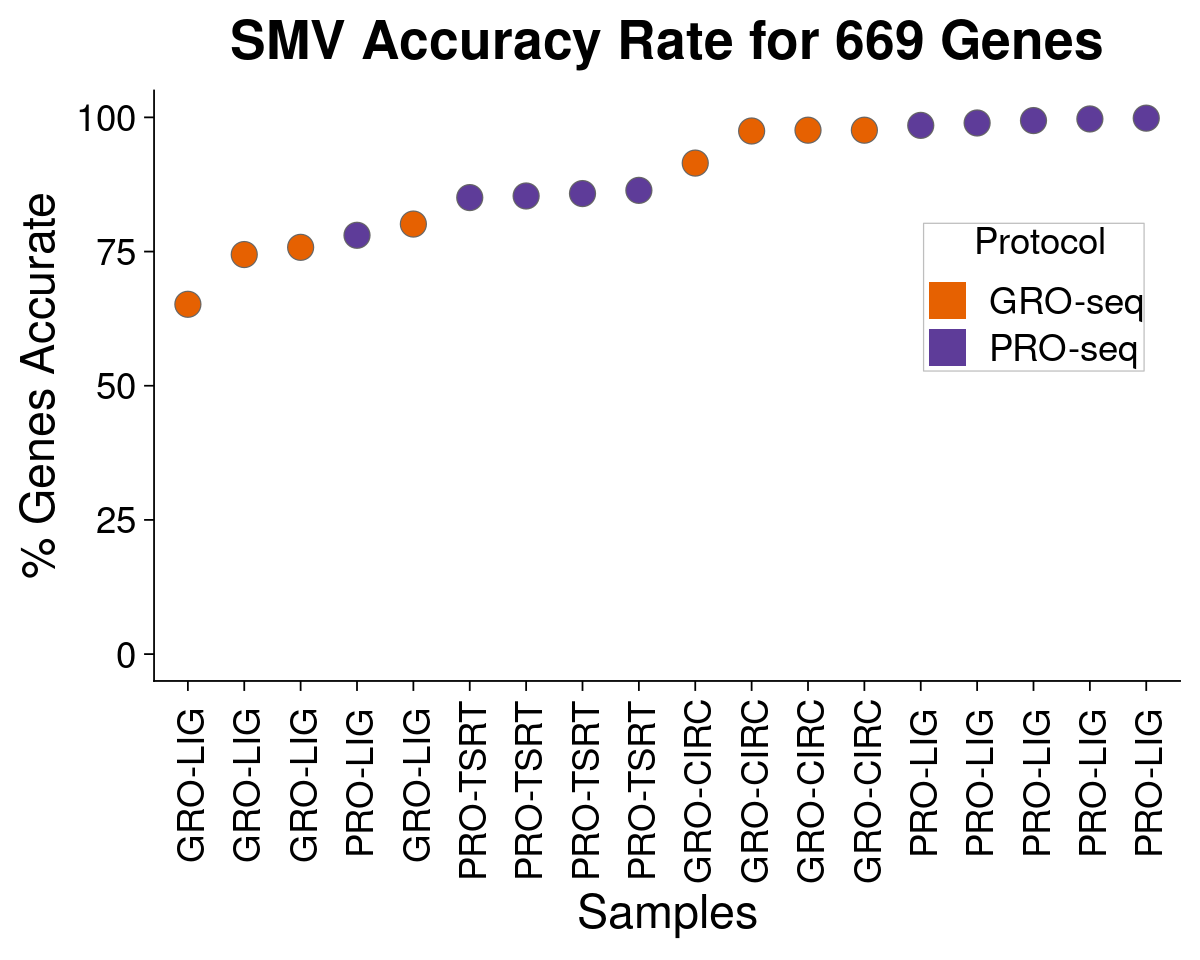

In [22]:
options(repr.plot.width=10, repr.plot.height=8)

svm_all669 <- ggplot(sample_accuracy_rate_all669, 
                  aes(x=reorder(sample_names, percent_accuracy),
                                 y=percent_accuracy, fill=V2)) + 
geom_point(size=7, shape=21,color="gray40") + 
theme_cowplot(24) +
scale_fill_manual(name='     Protocol',
                  values = c('#e66101','#5e3c99'),
                 labels = c("GRO-seq", "PRO-seq")) +
guides(fill = guide_legend(override.aes = list(shape = 15, 
                                               size = 10,
                                               col=c('#e66101','#5e3c99')))) +
ggtitle("SMV Accuracy Rate for 669 Genes") +
ylab("% Genes Accurate") +
xlab("Samples") +
scale_y_continuous(limits = c(0,100)) +
scale_x_discrete(breaks=as.character(sample_accuracy_rate_all669$sample_names), 
                 labels=as.character(sample_accuracy_rate_all669$id)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 22),
      legend.position = c(0.75,0.65),
      axis.text.x = element_text(size = 22,
                                 angle = 90, vjust=0.6, hjust=0.75),
      legend.title = element_text(size = 22),
      legend.text = element_text(size = 22),
      legend.background = element_blank(),
      legend.box.background = element_rect(colour = "gray")) 

svm_all669

## Overlay the large and smaller gene subsets

In [23]:
sample_accuracy_rate_all294$gene_subsets <- rep("294 genes", nrow(sample_accuracy_rate_all294))
sample_accuracy_rate_all669$gene_subsets <- rep("669 genes", nrow(sample_accuracy_rate_all669))

In [24]:
comparing_cv1 <- rbind(sample_accuracy_rate_all669, sample_accuracy_rate_all294)
comparing_cv1$samples <- factor(comparing_cv1$sample_names, 
                                levels = sample_accuracy_rate_all294[with(sample_accuracy_rate_all294, 
                                                                       order(percent_accuracy)),]$sample_names)

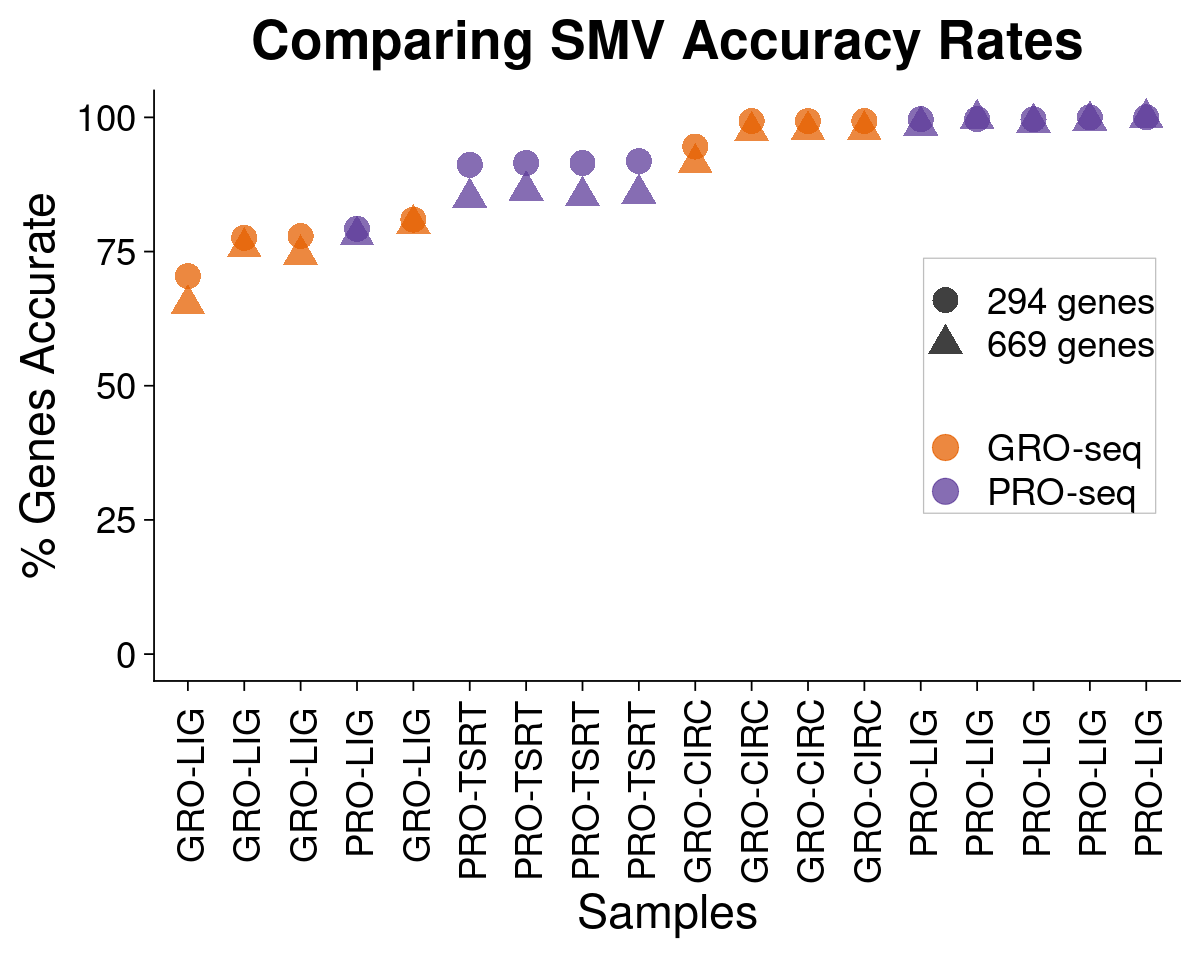

In [25]:
options(repr.plot.width=10, repr.plot.height=8)

sm1 <- ggplot(comparing_cv1, 
                  aes(x=samples,
                      y=percent_accuracy, 
                      color=V2, 
                      shape=gene_subsets)) + 
geom_point(size=7, alpha=0.75) + 
theme_cowplot(24) +
scale_color_manual(name='     Protocol',
                  values = c('#e66101','#5e3c99'),
                 labels = c("GRO-seq", "PRO-seq")) +
ggtitle("Comparing SMV Accuracy Rates") +
ylab("% Genes Accurate") +
xlab("Samples") +
scale_y_continuous(limits = c(0,100)) +
scale_x_discrete(breaks=as.character(sample_accuracy_rate_all669$sample_names), 
                 labels=as.character(sample_accuracy_rate_all669$id)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 28), 
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 22),
      legend.position = c(0.75,0.5),
      axis.text.x = element_text(size = 22,
                                 angle = 90, 
                                 vjust=0.6,
                                 hjust=0.75),
      #legend.title = element_text(size = 22),
      legend.title = element_blank(),
      legend.text = element_text(size = 22),
      legend.background = element_blank(),
      legend.box.background = element_rect(colour = "gray")) 

sm1

In [26]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1   tidyr_1.1.2     caret_6.0-86    ggplot2_3.3.3  
[5] lattice_0.20-38 e1071_1.7-6    

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-4         tidyselect_1.1.0     repr_1.1.0          
 [4] purrr_0.3.4          reshape2_1.4.4       splines_3.6.0       
 [7] colorspace_2.0-0     vctrs_0.3.6          gene